1. QRS complex detection from ECG signal using Pan Tompkins Algorithm
2. Dichrotic Notch detection using Lehnar Rangayyan method - all the graphs of the intermediate steps are displayed

[518, 1466, 2362, 3323, 4300, 5242, 6192, 7164, 8122, 9087, 10084, 11090, 12111, 13071, 14028, 15047, 16093, 17082, 18075]


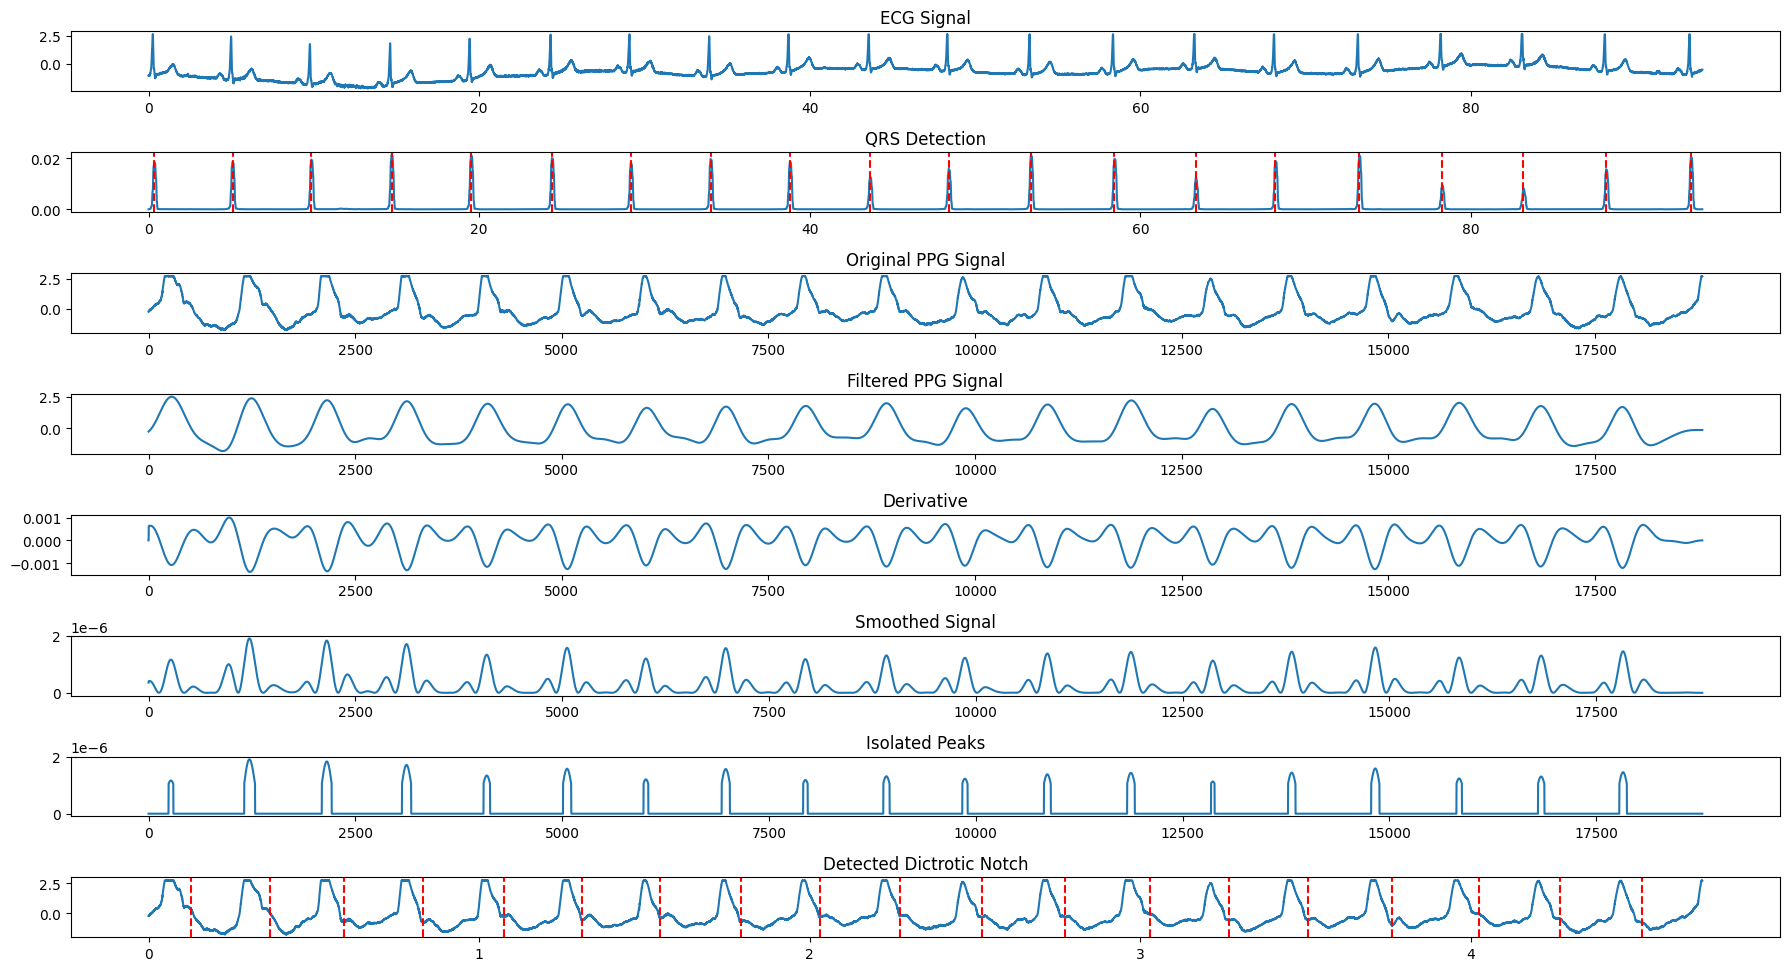

S1 - S2 interval for diastolic part : [ 450  948  896  961  977  942  950  972  958  965  997 1006 1021  960
  957 1019 1046  989  993]
S1 - S2 interval for systolic part : [-18007    948    953    971    962    979    954    965    960    970
    952    994   1011    983    964   1015   1002    984   1001]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc

#pan-tompkins algo for qrs detection
ecg = np.loadtxt(r'/workspaces/Detection-of-S1-S2-Heart-Sounds/ECG')
signal=ecg[1200:20000]
fs = 200
t = np.arange(0, len(signal) / fs, 1/fs)    
W1 = 5 * 2 / fs
W2 = 15 * 2 / fs
b, a = sc.butter(4, [W1, W2], 'bandpass')
ECG1 = sc.filtfilt(b, a, signal)
ECG = np.diff(ECG1)
Squared_ECG = np.power(ECG, 2)
N = 40
window = np.ones((1, N)) / N
ECG2 = np.convolve(np.squeeze(Squared_ECG), np.squeeze(window))
peaks, heights = sc.find_peaks(ECG2, height=np.mean(ECG2), distance=round(fs*0.200))

plt.figure(figsize=(18, 12))
plt.subplot(10, 1, 1)
plt.plot(t, signal, label='ECG Signal')
plt.title('ECG Signal')
plt.subplot(10, 1, 2)
plt.plot(t, ECG2[:len(t)], label='Squared ECG with QRS Detection')
for qrs_idx in peaks:
    plt.axvline(t[qrs_idx], color='red', linestyle='--')
plt.title('QRS Detection')


# Load PPG data
signal1 = np.loadtxt(r'/workspaces/Detection-of-S1-S2-Heart-Sounds/PPG')
ppg=signal1[1200:20000]

# Plot original PPG signal
plt.subplot(10, 1, 3)
plt.plot(ppg)
plt.title('Original PPG Signal')

# Filter the signal
fs1 = 4000  # Sampling frequency
cutoff = 10  # Cutoff frequency in Hz
nyquist = 0.5 * fs1
normal_cutoff = cutoff / nyquist
b1, a1 = sc.butter(5, normal_cutoff, btype='low')
y = sc.filtfilt(b1, a1, ppg)

# Plot filtered signal
plt.subplot(10, 1, 4)
plt.plot(y)
plt.title('Filtered PPG Signal')

# Calculate derivative
p = np.zeros(len(y))
for n in range(2,len(y)-2):
    p[n] = 2 * y[n - 2] - y[n - 1] - 2 * y[n] - y[n + 1] + 2 * y[n + 2]

# Plot derivative
plt.subplot(10, 1, 5)
plt.plot(p)
plt.title('Derivative')

# Smooth the signal (using convolution for smoothing)
window = np.ones(16) / 16  # Averaging window for smoothing
s = np.convolve(np.square(p), window, mode='valid')

# Plot smoothed signal
plt.subplot(10, 1, 6)
plt.plot(s)
plt.title('Smoothed Signal')

# Set threshold for peaks
threshold = 0.55*np.max(s)
peak = np.zeros(len(s))
k = 0
for n in range(len(s)):
    if s[n]<threshold:
        s[n]=0        
plt.subplot(10,1,7)
plt.plot(s)   
plt.title('Isolated Peaks')
# Find real peaks
rpeak = np.zeros_like(s)
k = 0
for n in range(1, len(s) - 1):
    if (s[n] - s[n + 1]) > 0 and (s[n] - s[n - 1]) > 0:
        rpeak[k] = n
        k += 1
rpeak=[int(i) for i in rpeak if i!=0]


# # Find dicrotic notch in smoothed wave
# threshold1 = 25
# peaky = np.zeros(len(rpeak))
# k = 0
# for n in range(len(rpeak) - 1):
#     if (rpeak[n + 1] - rpeak[n]) <= threshold1:
#         peaky[k] = rpeak[n + 1]
#         k += 1

ts = np.zeros(len(ppg))
tss = []
i=0
w = 0
for k in range(len(rpeak)):
    for n in range(rpeak[k] - 10, rpeak[k] + 250):
        if 0 <= n < len(ppg):  # Check if n is within valid indices
            ts[i] = ppg[n]
            i += 1
    ts = ts[:i]  # Remove trailing zeros
    min_index = np.argmin(ts)
    tss.append(rpeak[k] - 10 + min_index)

    w += 1
    i = 0  # Reset i for the next iteration

t1=np.arange(0,len(ppg)/4000,1/4000)
plt.subplot(10,1,8)
plt.plot(t1,ppg[:len(t1)])
for h in tss:
    plt.axvline(t1[h], color='red', linestyle='--')
plt.title('Detected Dictrotic Notch')
# Now, tss contains the timestamps of the real dicrotic notches

# Display results
print(tss)

plt.tight_layout()
plt.show()

#heart sounds
s2_onset = tss
s1_onset = peaks[:-1]
#Calculate S1 - S2 interval (diastolic part)
s1_s2_interval = np.diff(np.concatenate(([s1_onset[0]], s2_onset)))
#Calculate S2 - S1 interval (systolic part)
s2_s1_interval = np.diff(np.concatenate(([s2_onset[-1]], s1_onset)))
print("S1 - S2 interval for diastolic part :", s1_s2_interval)
print("S1 - S2 interval for systolic part :", s2_s1_interval)

-------------------------------------------------------------------------------------------------------------------------------------------

1. QRS Complex detection from ECG
2. Dichrotic Notch detection from PPG
3. S1 and S2 Detection from PCG

[   68  1016  1969  2940  3902  4881  5835  6800  7760  8730  9682 10676
 11687 12670 13634 14649 15651 16635 17636 18662]
[518, 1466, 2362, 3323, 4300, 5242, 6192, 7164, 8122, 9087, 10084, 11090, 12111, 13071, 14028, 15047, 16093, 17082, 18075]
[-551  948  896  961  977  942  950  972  958  965  997 1006 1021  960
  957 1019 1046  989  993]
[-397  948  953  971  962  979  954  965  960  970  952  994 1011  983
  964 1015 1002  984 1001]


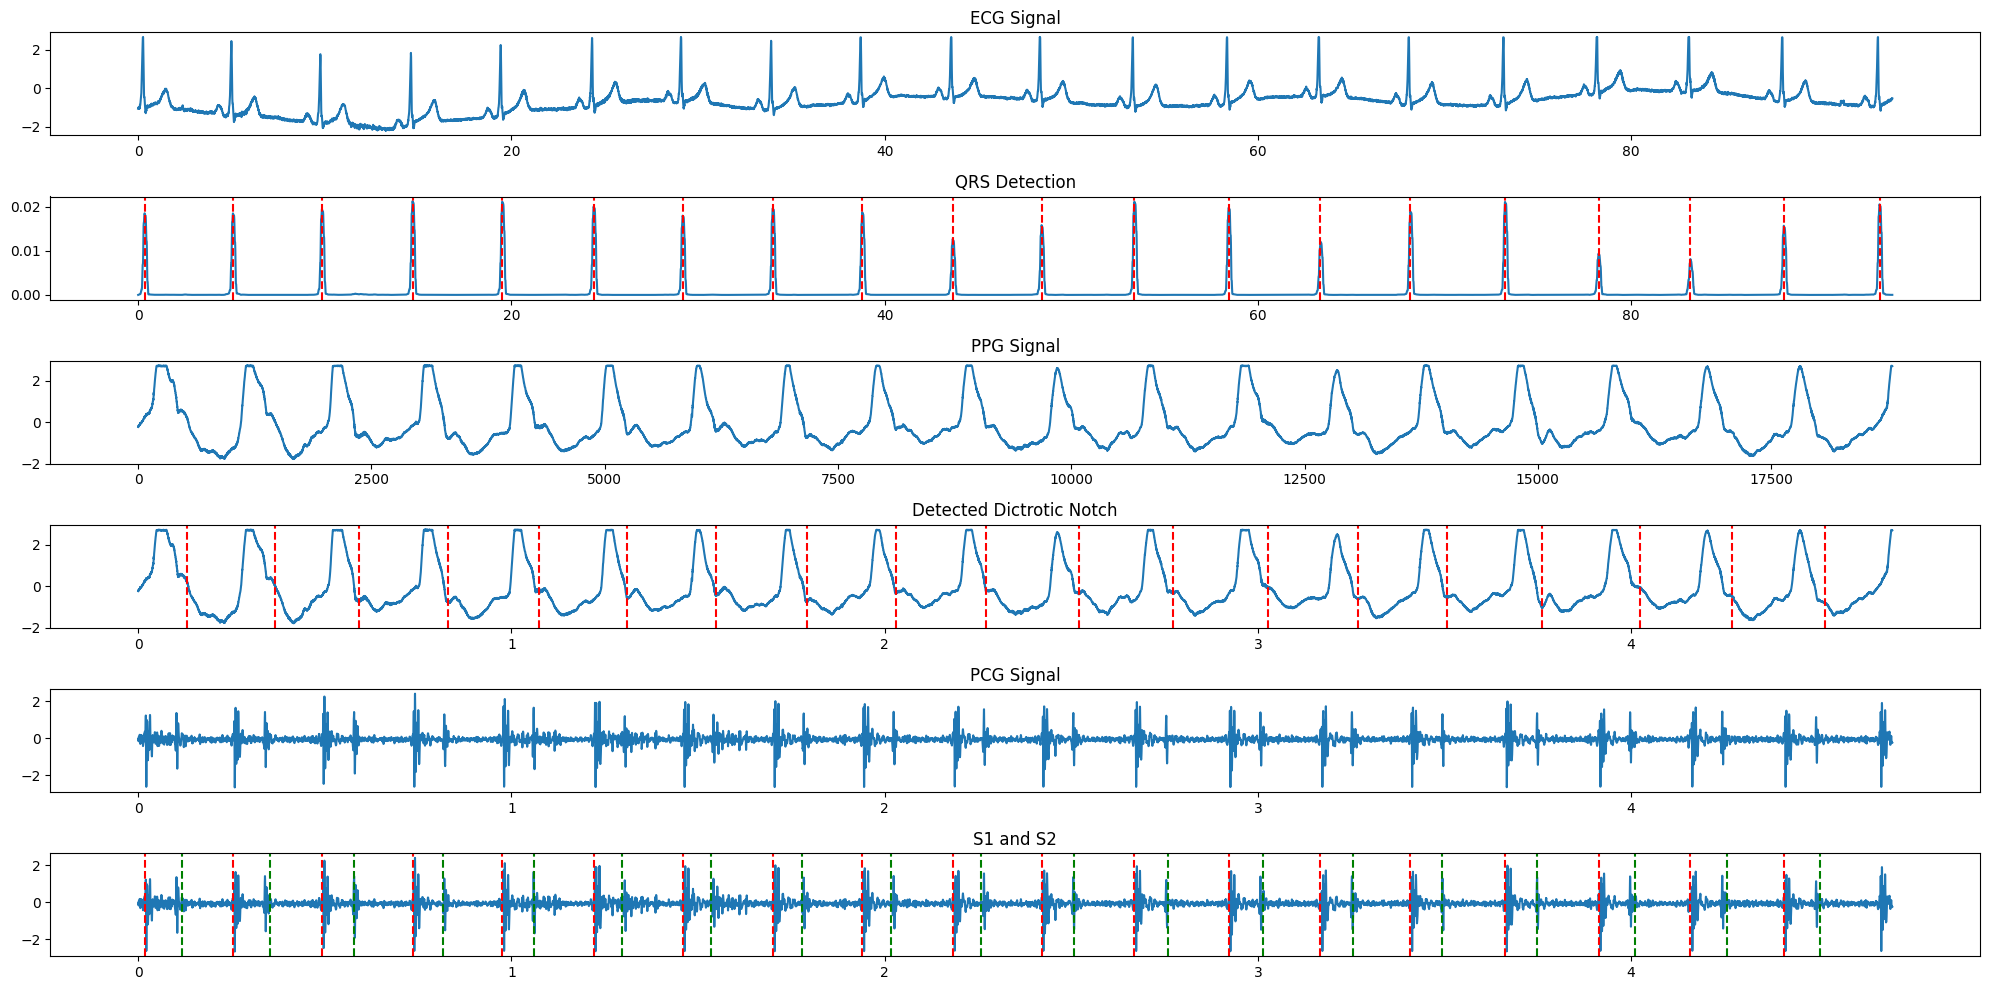

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc

#pantompkins algo for qrs detection
ecg = np.loadtxt(r'/workspaces/Detection-of-S1-S2-Heart-Sounds/ECG')
signal=ecg[1200:20000]
fs = 200
t = np.arange(0, len(signal) / fs, 1/fs)   
#t=np.linspace(0,30,len(signal)) 
W1 = 5 * 2 / fs
W2 = 15 * 2 / fs
b, a = sc.butter(4, [W1, W2], 'bandpass')
ECG1 = sc.filtfilt(b, a, signal)
ECG = np.diff(ECG1)
Squared_ECG = np.power(ECG, 2)
N = 40
window = np.ones((1, N)) / N
ECG2 = np.convolve(np.squeeze(Squared_ECG), np.squeeze(window))
peaks, heights = sc.find_peaks(ECG2, height=np.mean(ECG2), distance=round(fs*0.200))

plt.figure(figsize=(20, 10))
plt.subplot(6, 1, 1)
plt.plot(t, signal, label='ECG Signal')
plt.title('ECG Signal')
plt.subplot(6, 1, 2)
plt.plot(t, ECG2[:len(t)], label='Squared ECG with QRS Detection')
for qrs_idx in peaks:
    plt.axvline(t[qrs_idx], color='red', linestyle='--')
plt.title('QRS Detection')
print(peaks)

# Load PPG data
signal1 = np.loadtxt(r'/workspaces/Detection-of-S1-S2-Heart-Sounds/PPG')
ppg=signal1[1200:20000]

# Plot original PPG signal
plt.subplot(6, 1, 3)
plt.plot(ppg)
plt.title('PPG Signal')

# Filter the signal
fs1 = 4000  # Sampling frequency
cutoff = 10  # Cutoff frequency in Hz
nyquist = 0.5 * fs1
normal_cutoff = cutoff / nyquist
b1, a1 = sc.butter(5, normal_cutoff, btype='low')
y = sc.filtfilt(b1, a1, ppg)

# # Plot filtered signal
# plt.subplot(10, 1, 4)
# plt.plot(y)
# plt.title('Filtered PPG Signal')

# Calculate derivative
p = np.zeros(len(y))
for n in range(2,len(y)-2):
    p[n] = 2 * y[n - 2] - y[n - 1] - 2 * y[n] - y[n + 1] + 2 * y[n + 2]

# # Plot derivative
# plt.subplot(10, 1, 4)
# plt.plot(p)
# plt.title('Derivative')

# Smooth the signal (using convolution for smoothing)
window = np.ones(16) / 16  # Averaging window for smoothing
s = np.convolve(np.square(p), window, mode='valid')

# # Plot smoothed signal
# plt.subplot(10, 1, 5)
# plt.plot(s)
# plt.title('Smoothed Signal')

# Set threshold for peaks
threshold = 0.55*np.max(s)
peak = np.zeros(len(s))
k = 0
for n in range(len(s)):
    if s[n]<threshold:
        s[n]=0        
# plt.subplot(10,1,7)
# plt.plot(s)   
# plt.title('Isolated Peaks')
# Find real peaks
rpeak = np.zeros_like(s)
k = 0
for n in range(1, len(s) - 1):
    if (s[n] - s[n + 1]) > 0 and (s[n] - s[n - 1]) > 0:
        rpeak[k] = n
        k += 1
rpeak=[int(i) for i in rpeak if i!=0]


# # Find dicrotic notch in smoothed wave
# threshold1 = 25
# peaky = np.zeros(len(rpeak))
# k = 0
# for n in range(len(rpeak) - 1):
#     if (rpeak[n + 1] - rpeak[n]) <= threshold1:
#         peaky[k] = rpeak[n + 1]
#         k += 1

ts = np.zeros(len(ppg))
tss = []
i=0
w = 0
for k in range(len(rpeak)):
    for n in range(rpeak[k] - 10, rpeak[k] + 250):
        if 0 <= n < len(ppg):  # Check if n is within valid indices
            ts[i] = ppg[n]
            i += 1
    ts = ts[:i]  # Remove trailing zeros
    min_index = np.argmin(ts)
    tss.append(rpeak[k] - 10 + min_index)

    w += 1
    i = 0  # Reset i for the next iteration

t1=np.arange(0,len(ppg)/4000,1/4000)
#t1 = t
plt.subplot(6,1,4)
plt.plot(t1,ppg[:len(t1)])
for h in tss:
    plt.axvline(t1[h], color='red', linestyle='--')
plt.title('Detected Dictrotic Notch')
# Now, tss contains the timestamps of the real dicrotic notches

# Display results
print(tss)

tss=[int(i-52.6) for i in tss]
# peaks=[int(i*1000/fs) for i in peaks]

#identify s1 and s2 onset
s1_onset=peaks[:-1]
s2_onset=tss[:]

#calculate s1-s2 interval(diastolic part)
s1_s2_interval = np.diff(np.concatenate(([s1_onset[1]], s2_onset)))
print(s1_s2_interval)
#calculate s2-s1 interval(systolic part)
s2_s1_interval = np.diff(np.concatenate(([s2_onset[0]], s1_onset)))
print(s2_s1_interval)

signal2=np.loadtxt(r'/workspaces/Detection-of-S1-S2-Heart-Sounds/PCG')
pcg=signal2[1200:20000]
t2=np.arange(0,len(pcg)/4000,1/4000)

plt.subplot(6,1,5)
plt.plot(t2,pcg)
plt.title('PCG Signal')

plt.subplot(6,1,6)
plt.plot(t2,pcg[:len(t2)])
for o in s1_onset:
    plt.axvline(t2[o], color='red', linestyle='--')
for p in s2_onset:
    plt.axvline(t2[p], color='green', linestyle='--')
plt.title('S1 and S2')

plt.tight_layout()
plt.show()